In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')
df1 = df.copy()

In [3]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df.shape

(1460, 81)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

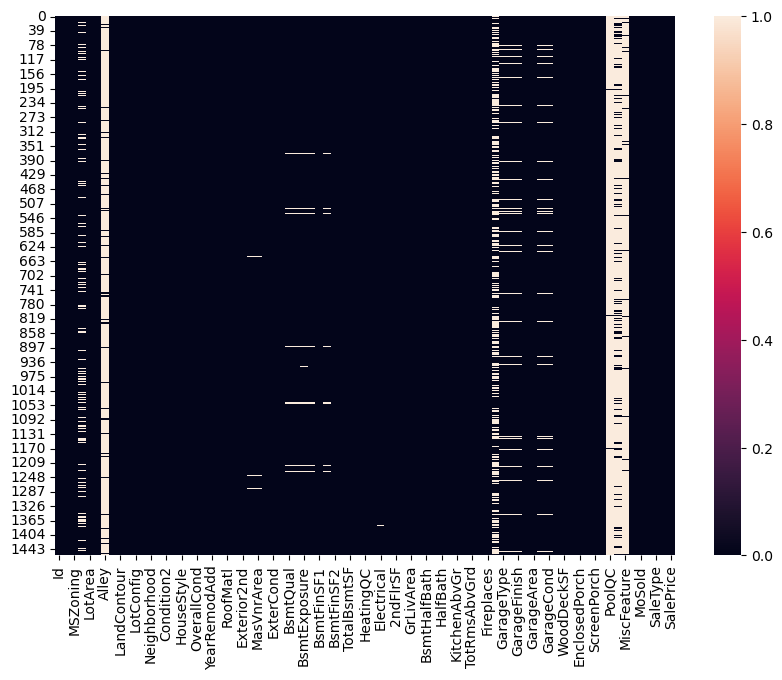

In [9]:
fig,ax = plt.subplots(figsize=(10,7))
sns.heatmap(df.isnull(),cbar=True)

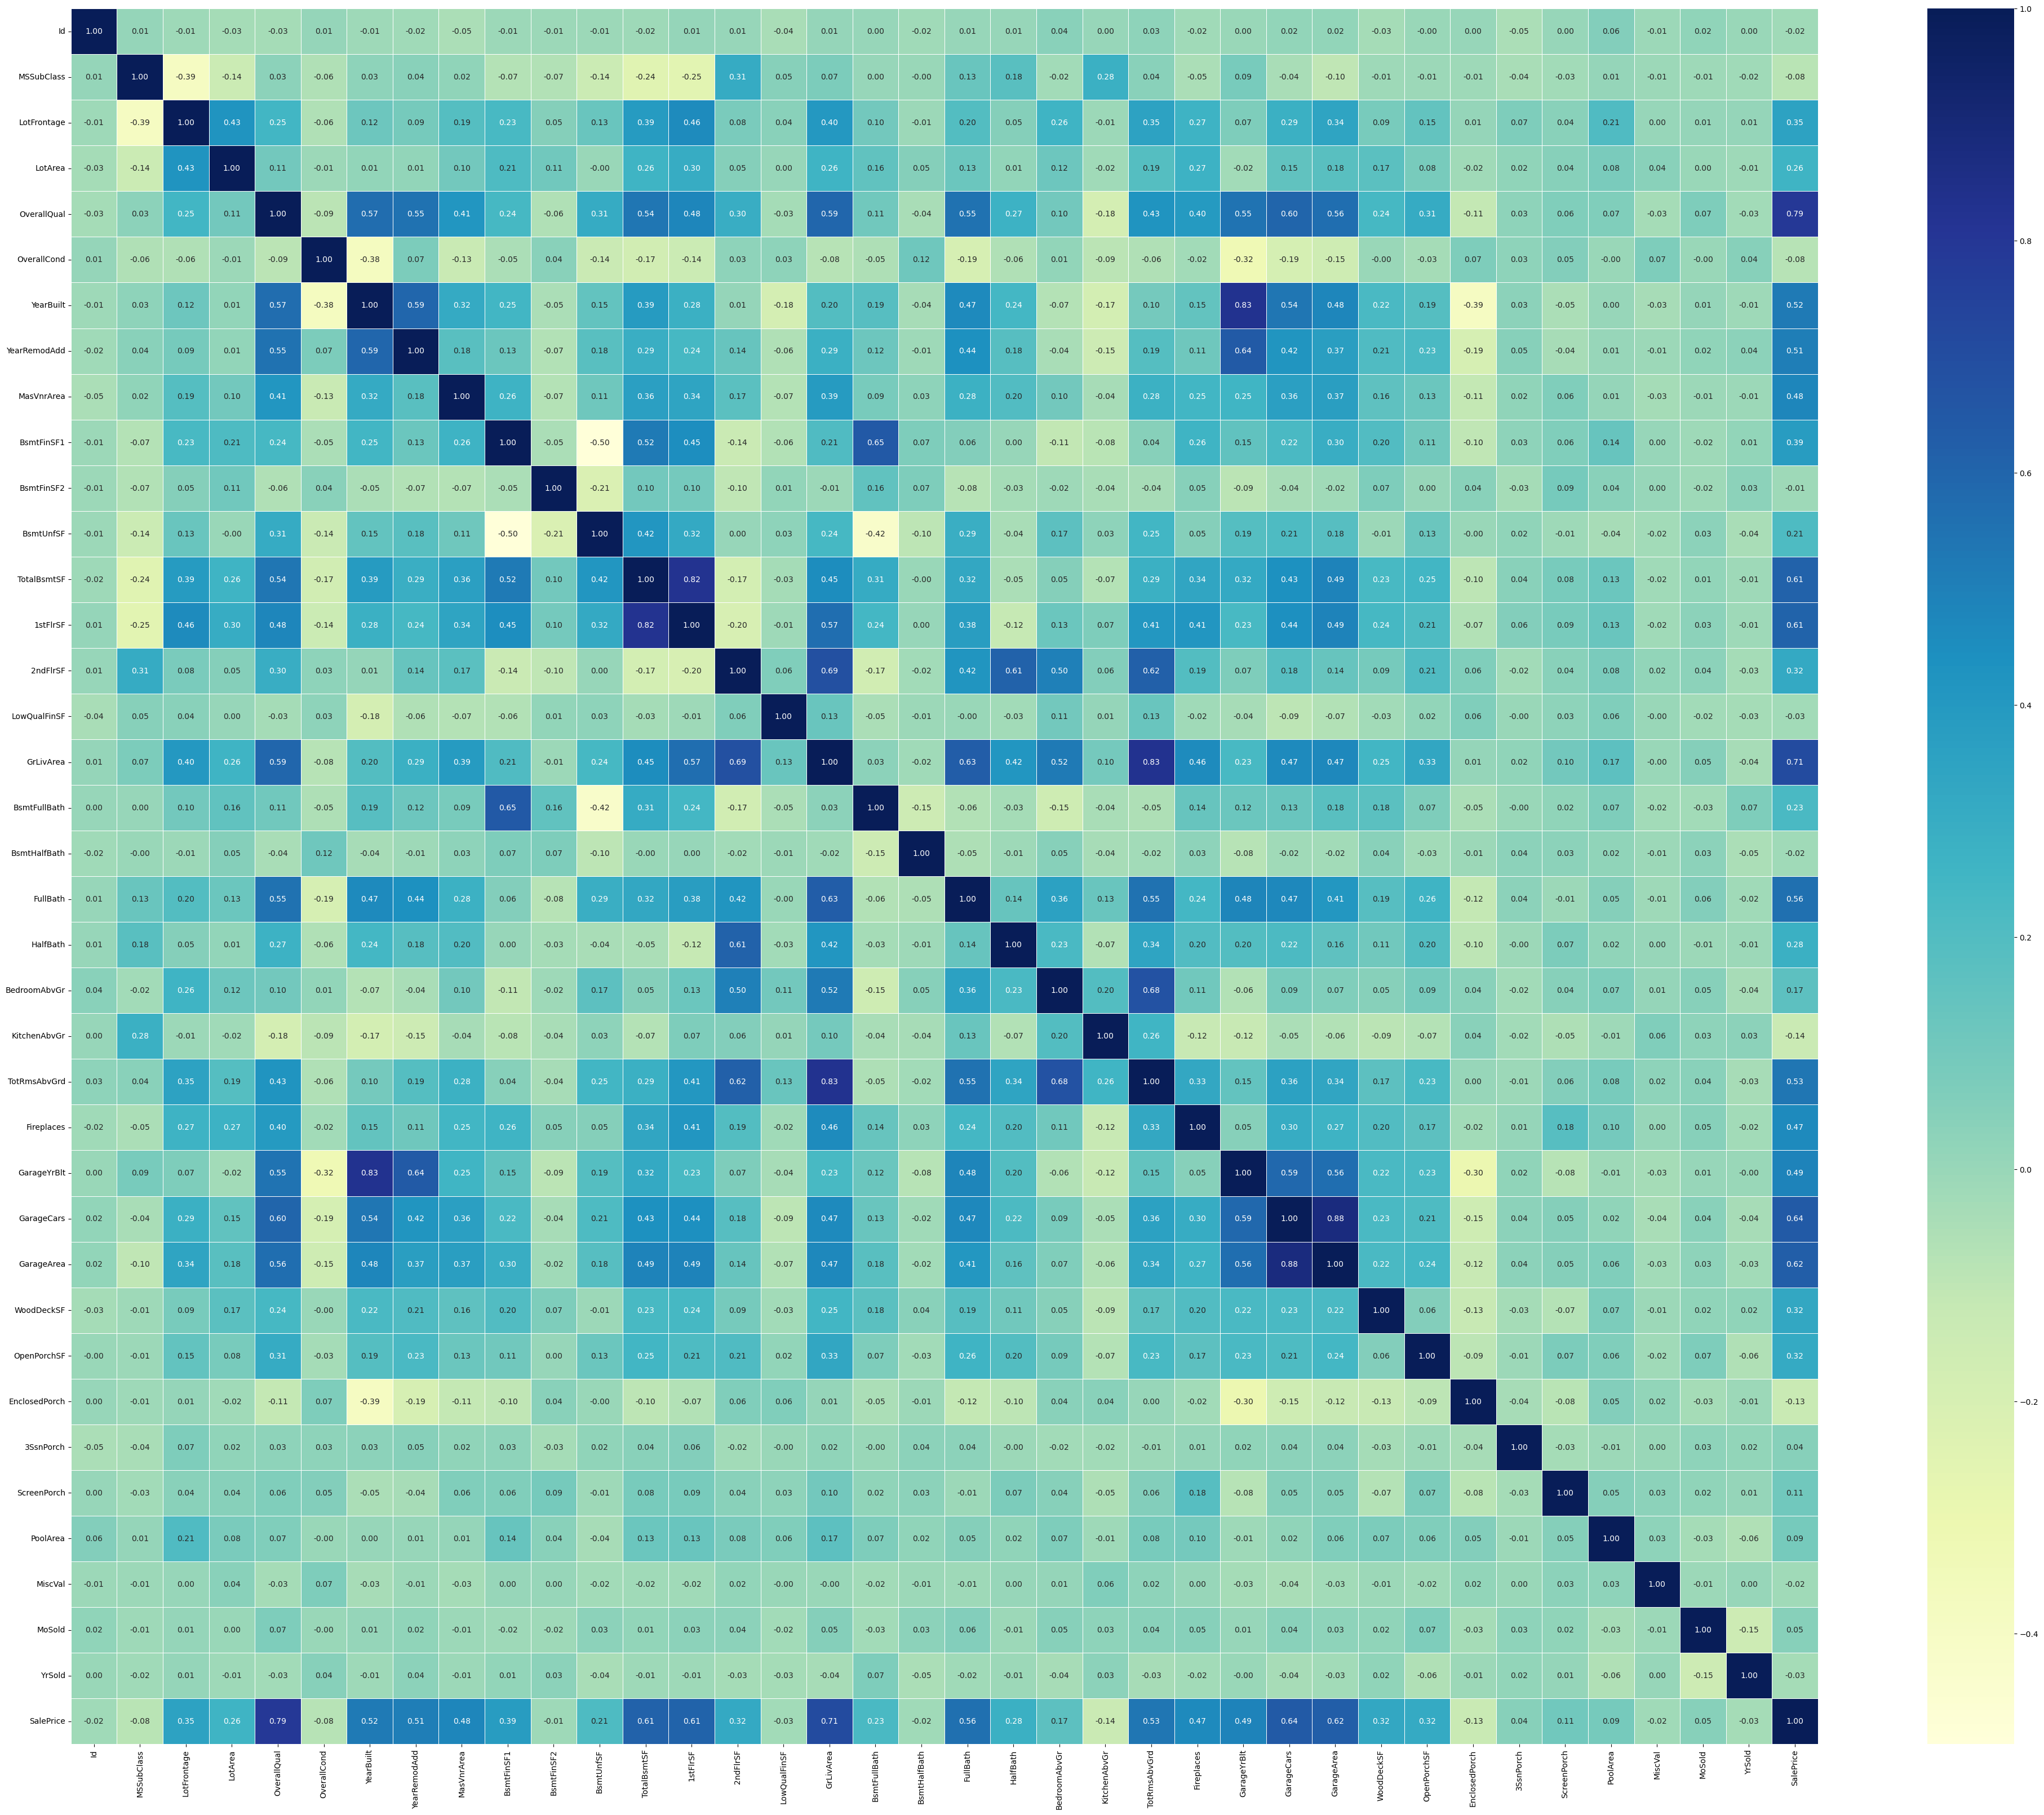

In [10]:
# To find correlation b/w different columns
corr_matrix = df.corr()

# corr_matrix

fix,ax = plt.subplots(figsize=(50,40))

ax = sns.heatmap(corr_matrix,annot=True,lw=0.5,fmt=".2f",cmap="YlGnBu")
# lw = linewidth
# YlGnBu = Yellow, Green, Blue

In [11]:
df['Id'].isnull().sum()

0

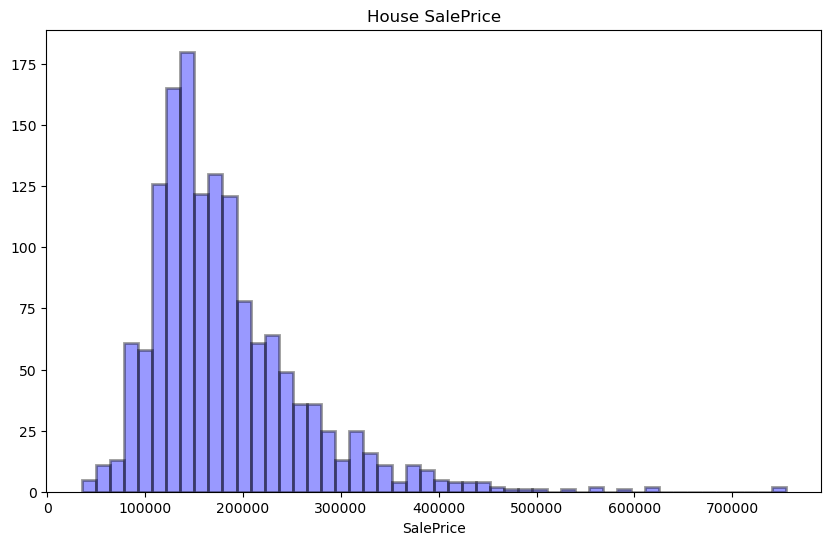

In [12]:
# sale price data visualization

plt.figure(figsize=[10,6])
sns.distplot(df['SalePrice'], color='blue',hist_kws=dict(edgecolor="black", lw=2), bins=50, kde = False)
plt.title('House SalePrice')
plt.show()

In [13]:
df['LotFrontage'] = df['LotFrontage'].mean()

In [14]:
df['Alley'].isnull().sum()

1369

In [15]:
df.drop("Alley",inplace=True,axis=1)

In [16]:
def check_null_columns(df):
    nan_cols = [i for i in df.columns if df[i].isnull().any()]
    print(nan_cols)

In [17]:
def find_index_of_row(column):
    return(df[df[column].isnull()].index.tolist())

In [18]:
def drop_null_values(list_of_index):
    df.drop(list_of_index, axis=0, inplace=True)
    return check_null_columns(df)

In [19]:
check_null_columns(df)

['MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [20]:
df[df['MasVnrType'].isnull()].index.tolist()

[234, 529, 650, 936, 973, 977, 1243, 1278]

In [21]:
df.drop([234, 529, 650, 936, 973, 977, 1243, 1278], axis=0, inplace=True)

In [22]:
check_null_columns(df)

['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [23]:
print(find_index_of_row('BsmtQual'))

[17, 39, 90, 102, 156, 182, 259, 342, 362, 371, 392, 520, 532, 533, 553, 646, 705, 736, 749, 778, 868, 894, 897, 984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216, 1218, 1232, 1321, 1412]


In [24]:
drop_null_values([17, 39, 90, 102, 156, 182, 259, 342, 362, 371, 392, 520, 532, 533, 553, 646, 705, 736, 749, 778, 868, 894, 897, 984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216, 1218, 1232, 1321, 1412])

['BsmtExposure', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [25]:
df.drop('BsmtExposure',axis=1,inplace=True)

In [26]:
check_null_columns(df)

['BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [27]:
df.drop('FireplaceQu',inplace=True,axis=1)

In [28]:
drop_null_values([48,78,88,89,99,108,125,127,140,148,155,163,165,198,210,241,250,287,291,307,375,386,393,431,434,441,464,495,528,535,562,582,613,614,620,635,636,638,649,710,738,750,784,826,843,921,942,954,960,968,970,976,1009,1030,1038,1096,1123,1131,1137,1143,1173,1219,1234,1257,1283,1323,1325,1326,1337,1349,1407,1449,1450,1453])

['BsmtFinType2', 'Electrical', 'PoolQC', 'Fence', 'MiscFeature']


In [29]:
df.drop('PoolQC',axis=1,inplace=True)

In [30]:
check_null_columns(df)

['BsmtFinType2', 'Electrical', 'Fence', 'MiscFeature']


In [31]:
df.drop('Fence',inplace=True,axis=1)

In [32]:
check_null_columns(df)

['BsmtFinType2', 'Electrical', 'MiscFeature']


In [33]:
df.drop('MiscFeature',inplace=True,axis=1)

In [34]:
# After data cleaing
df.shape

(1341, 75)

In [35]:
check_null_columns(df)

['BsmtFinType2', 'Electrical']


In [36]:
find_index_of_row('BsmtFinType2')

[332]

In [37]:
drop_null_values([332])

['Electrical']


In [38]:
df['Electrical'].isna().sum()

1

In [39]:
find_index_of_row('Electrical')

[1379]

In [40]:
drop_null_values([1379])

[]


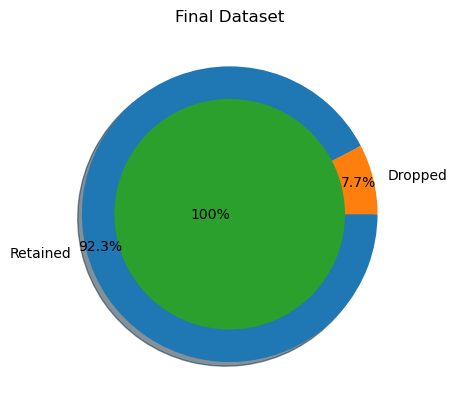

In [41]:
# df1 = df.copy()
df1.columns=[i.replace('-','_') for i in df1.columns]

plt.title('Final Dataset')
plt.pie([df1.shape[0], df1.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df1.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

<AxesSubplot:>

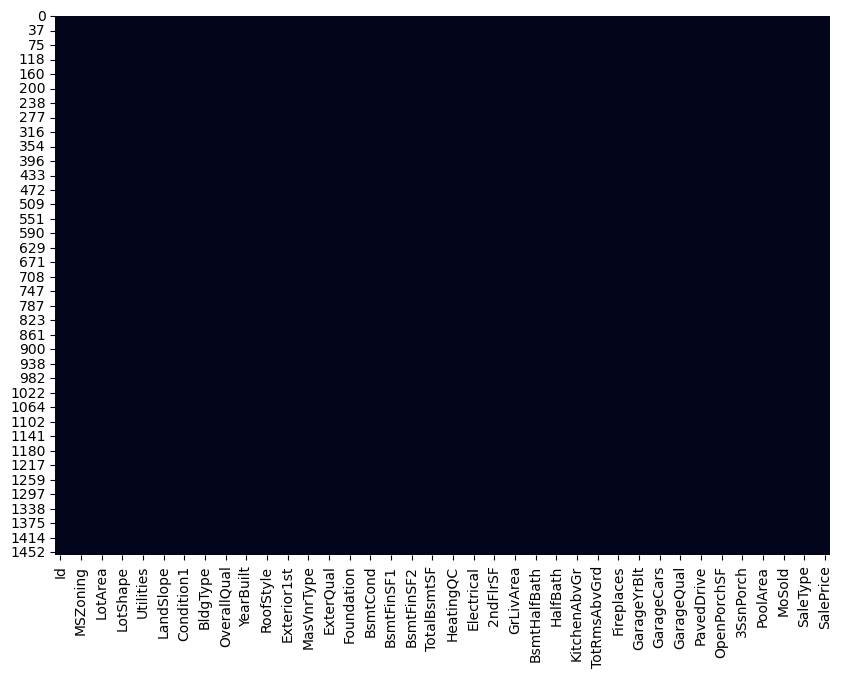

In [42]:
# After Data cleaing
fig,ax = plt.subplots(figsize=(10,7))
sns.heatmap(df.isnull(),cbar=False)

In [43]:
for label,content in df.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [44]:
df_temp = df.copy()
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype('category').cat.as_ordered()

In [45]:
x = df.drop("SalePrice",axis=1)
y = df["SalePrice"]

In [46]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["MSZoning",
"Street",
"LotShape",
"LandContour",
"Utilities",
"LotConfig",
"LandSlope",
"Neighborhood",
"Condition1",
"Condition2",
"BldgType",
"HouseStyle",
"RoofStyle",
"RoofMatl",
"Exterior1st",
"Exterior2nd",
"MasVnrType",
"ExterQual",
"ExterCond",
"Foundation",
"BsmtQual",
"BsmtCond",
"BsmtFinType1",
"BsmtFinType2",
"Heating",
"HeatingQC",
"CentralAir",
"Electrical",
"KitchenQual",
"Functional",
"GarageType",
"GarageFinish",
"GarageQual",
"GarageCond",
"PavedDrive",
"SaleType",
"SaleCondition"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot",
                                   one_hot,
                                   categorical_features)],
                                remainder="passthrough"
                               )
transformed_x_test = transformer.fit_transform(x)
transformed_x_test

<1339x262 sparse matrix of type '<class 'numpy.float64'>'
	with 83616 stored elements in Compressed Sparse Row format>

In [47]:
pd.DataFrame(transformed_x_test)

,0
0,"(0, 3)\t1.0\n (0, 6)\t1.0\n (0, 10)\t1.0\n..."
1,"(0, 3)\t1.0\n (0, 6)\t1.0\n (0, 10)\t1.0\n..."
2,"(0, 3)\t1.0\n (0, 6)\t1.0\n (0, 7)\t1.0\n ..."
3,"(0, 3)\t1.0\n (0, 6)\t1.0\n (0, 7)\t1.0\n ..."
4,"(0, 3)\t1.0\n (0, 6)\t1.0\n (0, 7)\t1.0\n ..."
...,...
1334,"(0, 3)\t1.0\n (0, 6)\t1.0\n (0, 10)\t1.0\n..."
1335,"(0, 3)\t1.0\n (0, 6)\t1.0\n (0, 10)\t1.0\n..."
1336,"(0, 3)\t1.0\n (0, 6)\t1.0\n (0, 10)\t1.0\n..."
1337,"(0, 3)\t1.0\n (0, 6)\t1.0\n (0, 10)\t1.0\n..."


In [48]:
# dummies = pd.get_dummies(df[["MSZoning",
# "Street",
# "LotShape",
# "LandContour",
# "Utilities",
# "LotConfig",
# "LandSlope",
# "Neighborhood",
# "Condition1",
# "Condition2",
# "BldgType",
# "HouseStyle",
# "RoofStyle",
# "RoofMatl",
# "Exterior1st",
# "Exterior2nd",
# "MasVnrType",
# "ExterQual",
# "ExterCond",
# "Foundation",
# "BsmtQual",
# "BsmtCond",
# "BsmtFinType1",
# "BsmtFinType2",
# "Heating",
# "HeatingQC",
# "CentralAir",
# "Electrical",
# "KitchenQual",
# "Functional",
# "GarageType",
# "GarageFinish",
# "GarageQual",
# "GarageCond",
# "PavedDrive",
# "SaleType",
# "SaleCondition"]])
# dummies

In [49]:
def predict_vs_actual_data(actual_data,predicted_data,dataframe,color="red"):
    sns.lmplot(x=actual_data, y=predicted_data, data=dataframe, fit_reg=False,height=5,aspect=2)
    d_line= np.arange(dataframe.min().min(), dataframe.max().max())
    plt.plot(d_line, d_line, color=color, linestyle='--')
    plt.show()

In [50]:
# printing diffrent error and score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
def evaluate_metrics(y_true,y_preds):
    r2 = r2_score(y_true=y_true,y_pred=y_preds)
    mae = mean_absolute_error(y_true=y_true,y_pred=y_preds)
    mse = mean_squared_error(y_true=y_true,y_pred=y_preds)
    rmse = np.sqrt(mse)
    return pd.DataFrame({"r2_score":[r2],
            "mean_absolute_error":[mae],
            "mean_squared_error":[mse],
            "root_mean_squard_error":[rmse]
            },
            )

In [51]:
# split data into train_test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(transformed_x_test,y,test_size=0.2)

In [52]:
## model_0 LinearRegression
from sklearn.linear_model import LinearRegression
model_0 = LinearRegression()
model_0.fit(x_train,y_train)
model_0_accuracy_train = model_0.score(x_train,y_train)
model_0_accuracy_test = model_0.score(x_test,y_test)
print(model_0_accuracy_train,model_0_accuracy_test)

0.8931283526079022 0.8309157844818287


In [53]:
model_0_predict = model_0.predict(x_test)
model_0_predict[:10]

array([181932.94708604, 200447.78676866, 149512.88672333, 120063.84126056,
       341792.7525656 , 106570.31783129, 198407.06199876, 109001.14216832,
       317439.41860642,  85888.07214722])

In [54]:
model_0_dataframe = pd.DataFrame({"actual_data":y_test,"predicted_data":model_0_predict})
model_0_dataframe

,actual_data,predicted_data
86,174000,181932.947086
1320,156500,200447.786769
422,113000,149512.886723
806,135500,120063.841261
825,385000,341792.752566
...,...,...
491,133000,175497.559286
795,171000,186570.992383
196,311872,366731.758996
166,190000,211403.812796


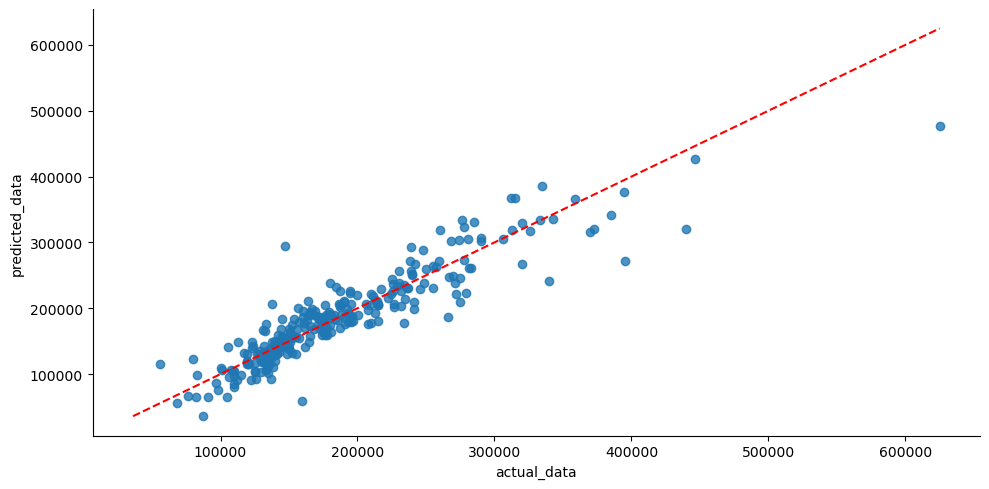

In [55]:
predict_vs_actual_data(actual_data='actual_data',predicted_data='predicted_data',dataframe=model_0_dataframe)

In [56]:
model_0_metrics = evaluate_metrics(y_true=y_test,y_preds=model_0_predict)
model_0_metrics

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squard_error
0,0.830916,20700.129942,9.108068e+08,30179.576452


In [57]:
# adding basic other model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
models = {
          "KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier()
         }

def fit_and_score(model,x_train,x_test,y_train,y_test):
    np.random.seed(42)
    model_scores = {}
    for name,model in models.items():
        model.fit(x_train,y_train)
        model_scores[name] = model.score(x_test,y_test)
    return model_scores

In [58]:
model_score = fit_and_score(model=models,x_train=x_train,y_train=y_train,x_test=x_test,y_test=y_test)
model_score

{'KNN': 0.007462686567164179, 'Random Forest': 0.026119402985074626}

<AxesSubplot:>

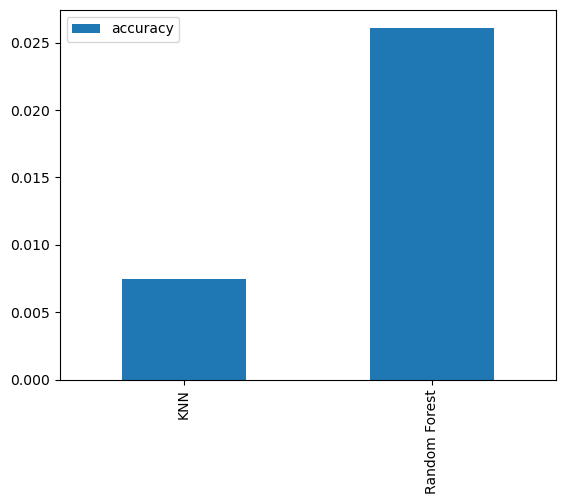

In [59]:
model_compare = pd.DataFrame(model_score,index=['accuracy'])
model_compare.T.plot.bar()

In [60]:
# Ridge model
from sklearn.linear_model import Ridge
model_1 = Ridge()
model_1.fit(x_train,y_train)
model_1_accuracy_train = model_1.score(x_train,y_train)
model_1_accuracy_train

0.7218737203351056

In [61]:
# test score
model_1_accuracy_test = model_1.score(x_test,y_test)
model_1_accuracy_test

0.7885641231592098

In [62]:
model_1_prediction = model_1.predict(x_test)

In [63]:
model_1_prediction[:10]

array([194885.31879994, 183673.24838686, 114011.85388174, 114049.40630829,
       355261.50996071, 128617.50238778, 253499.67265875, 121662.47728069,
       302277.7648293 , 139994.6754688 ])

In [64]:
model_1_dataframe = pd.DataFrame({"actual_data":y_test,"predicted_data":model_1_prediction})
model_1_dataframe

,actual_data,predicted_data
86,174000,194885.318800
1320,156500,183673.248387
422,113000,114011.853882
806,135500,114049.406308
825,385000,355261.509961
...,...,...
491,133000,128486.026606
795,171000,191431.301648
196,311872,303528.736219
166,190000,231084.316474


In [65]:
model_1_metrics = evaluate_metrics(y_test,y_preds=model_1_prediction)
model_1_metrics

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squard_error
0,0.788564,23421.246375,1.138943e+09,33748.22591


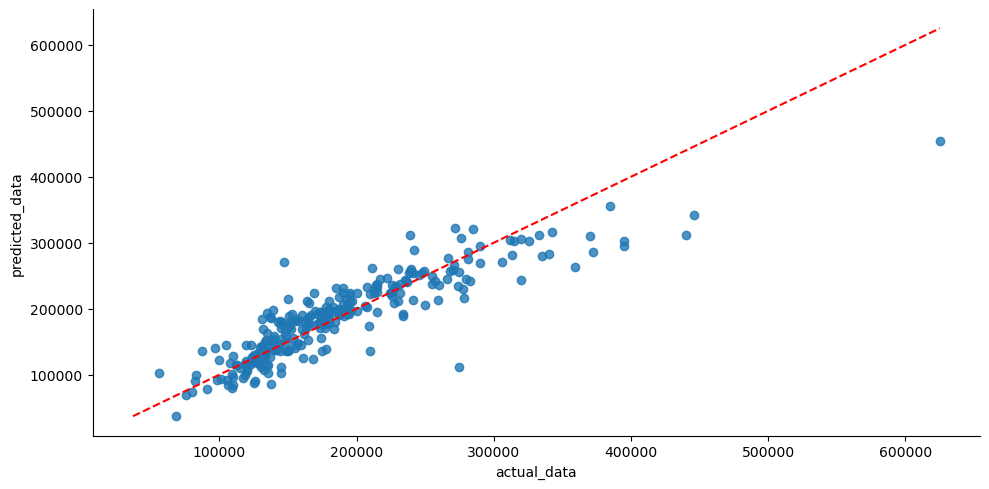

In [66]:
predict_vs_actual_data('actual_data','predicted_data',model_1_dataframe,color='red')

In [67]:
# model_2 Lasso
from sklearn.linear_model import Lasso
model_2 = Lasso(alpha=100, fit_intercept=False, precompute=True, copy_X=False, max_iter=2000, tol=0.005, warm_start=True, positive=False, random_state=32, selection='random')
model_2.fit(x_train,y_train)
model_2_accuracy_train = model_2.score(x_train,y_train)
model_2_accuracy_train

0.92412205586254

In [68]:
model_2_accuracy__test = model_2.score(x_test,y_test)
model_2_accuracy__test

0.8397775289304632

In [69]:
model_2_prediction = model_2.predict(x_test)
model_2_prediction[:10]

array([181271.73260068, 180476.43741796, 122525.59509436, 118913.61177843,
       142778.42375737, 119245.82928664, 213591.19255623, 117815.26895914,
       323832.99245193,  99710.45169496])

In [70]:
model_2_dataframe = pd.DataFrame({"actual_data":y_test,"predicted_data":model_2_prediction})
model_2_dataframe

,actual_data,predicted_data
86,174000,181271.732601
1320,156500,180476.437418
422,113000,122525.595094
806,135500,118913.611778
825,385000,142778.423757
...,...,...
491,133000,150748.325723
795,171000,171386.427042
196,311872,360152.674823
166,190000,209672.543101


In [71]:
evaluate_metrics(y_test,model_2_prediction)

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squard_error
0,0.839778,16875.612085,8.630712e+08,29378.073955


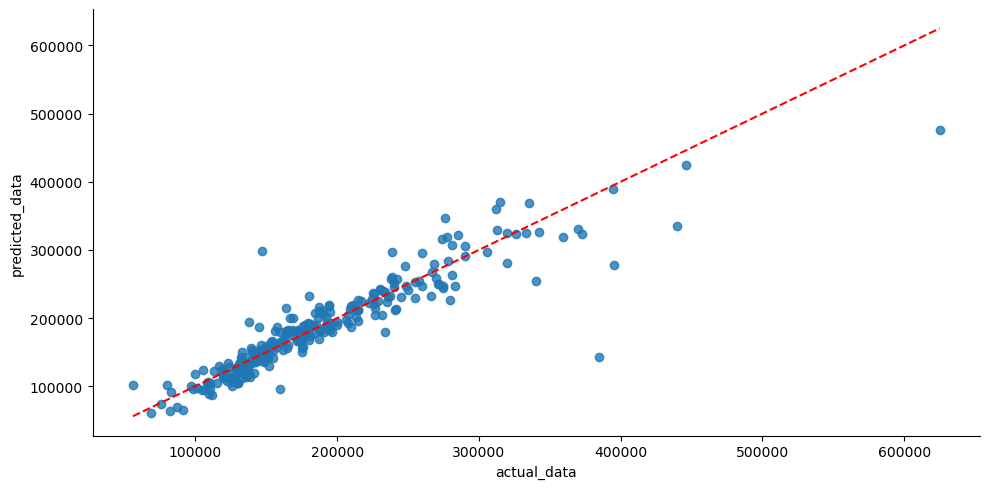

In [72]:
predict_vs_actual_data('actual_data','predicted_data',model_2_dataframe)

In [73]:
# model_3 elasticnet
from sklearn.linear_model import ElasticNet
model_3 = ElasticNet()
model_3.fit(x_train,y_train)
model_3_accuracy_train = model_3.score(x_train,y_train)
model_3_accuracy_train

0.8132949221708594

In [74]:
model_3_accuracy_test = model_3.score(x_test,y_test)
model_3_accuracy_test

0.8554150548626653

In [75]:
model_3_prediction = model_3.predict(x_test)
model_3_prediction[:10]

array([188569.62247825, 179598.8949299 , 117205.036933  , 112691.21985052,
       389282.83678013, 143574.55043269, 233693.68257386, 110527.70698386,
       325324.40708168, 116640.55433874])

In [76]:
model_3_dataframe = pd.DataFrame({"actual_data":y_test,"predicted_data":model_3_prediction})
model_3_dataframe

,actual_data,predicted_data
86,174000,188569.622478
1320,156500,179598.894930
422,113000,117205.036933
806,135500,112691.219851
825,385000,389282.836780
...,...,...
491,133000,146337.743948
795,171000,179852.402241
196,311872,315273.733345
166,190000,228090.796955


In [77]:
evaluate_metrics(y_true=y_test,y_preds=model_3_prediction)

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squard_error
0,0.855415,18014.553672,7.788365e+08,27907.642071


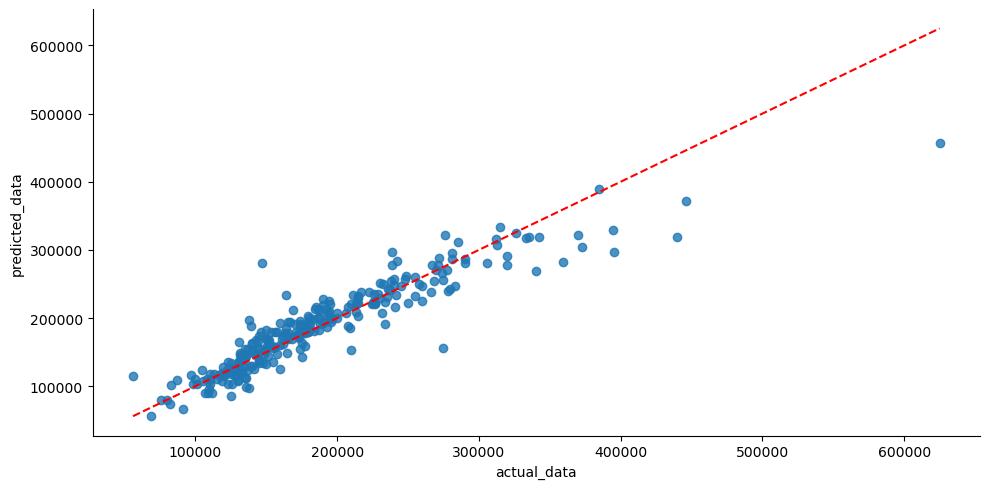

In [78]:
predict_vs_actual_data('actual_data','predicted_data',model_3_dataframe)

In [79]:
# model_4 RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model_4 = RandomForestClassifier(n_estimators=1200,max_depth=20,min_samples_split=4,min_samples_leaf=4,max_features=80)
model_4.fit(x_train,y_train)
model_4_accuracy_train = model_4.score(x_train,y_train)
model_4_accuracy_train

0.9906629318394025

In [80]:
model_4_accuracy_test = model_4.score(x_test,y_test)
model_4_accuracy_test

0.018656716417910446

In [81]:
model_4_prediction = model_4.predict(x_test)
model_4_prediction[:10]

array([174000, 167000, 115000, 143000, 501837, 144000, 190000, 139000,
       320000, 120500], dtype=int64)

In [82]:
model_4_dataframe = pd.DataFrame({"actual_data":y_test,"predicted_data":model_4_prediction})

In [83]:
evaluate_metrics(y_test,model_4_prediction)

,r2_score,mean_absolute_error,mean_squared_error,root_mean_squard_error
0,0.720965,25481.261194,1.503077e+09,38769.53331


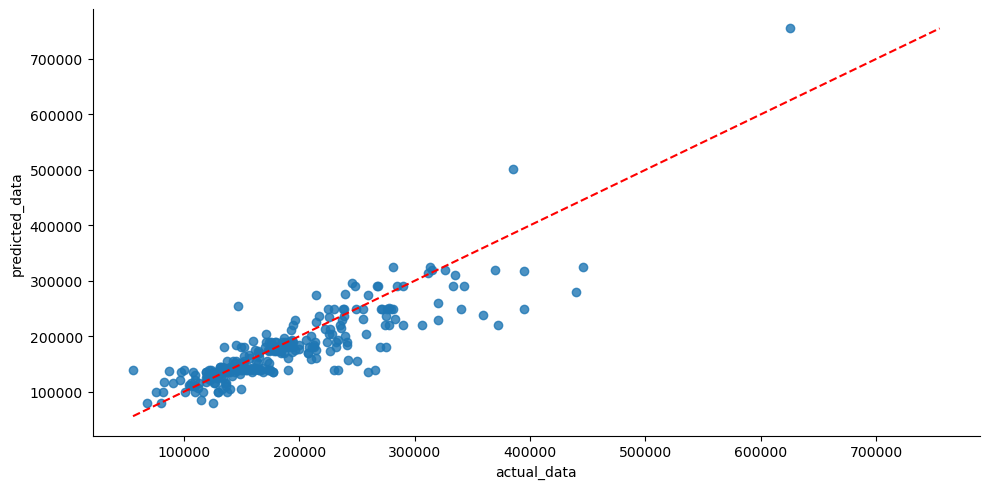

In [84]:
predict_vs_actual_data('actual_data','predicted_data',model_4_dataframe)

In [85]:
# using RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators":[10,100,200,500,1000,1200],
        "max_depth":[None,5,10,20,30],
        "max_features":["auto","sqrt"],
        "min_samples_split":[2,4,6],
        "min_samples_leaf":[1,2,4]
       }

clf = RandomForestClassifier(n_jobs=5)

rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10,
                            cv = 5,
                            verbose=2
                           )

In [86]:
rs_clf.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   2.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=200; total time=   0.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   1.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   1.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; tot

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=5),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [87]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 5}

In [88]:
rs_clf_accuracy = rs_clf.score(x_train,y_train)
rs_clf_accuracy

0.4042950513538749

In [89]:
rs_clf_test_accuracy = rs_clf.score(x_test,y_test)
rs_clf_test_accuracy

0.007462686567164179

In [90]:
from sklearn.model_selection import RandomizedSearchCV

grid_lasso = {"alpha":[1.0,2.0,3.0], 
        "fit_intercept":[True,False], 
        "precompute":[False,True], 
        "copy_X":[True,False], 
        "max_iter":[1000,1200,1300,1400,1500], 
        "tol":[0.0001,0.0002,0.0003,0.0004], 
        "warm_start":[False,True], 
        "positive":[False,True], 
        "random_state":[None,42], 
        "selection":['cyclic']
       }

clf_lasso = Lasso()

rs_clf_lasso = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=10,
                            cv = 5,
                            verbose=2
                           )
rs_clf_lasso.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   2.9s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   1.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   1.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   1.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=500; total time=   1.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; t

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=5),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [91]:
rs_clf_train_lasso = rs_clf_lasso.score(x_train,y_train)
rs_clf_test_lasso = rs_clf_lasso.score(x_test,y_test)
print(rs_clf_train_lasso,rs_clf_test_lasso)

0.45938375350140054 0.011194029850746268


In [92]:
rs_clf_lasso.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 5}

In [ ]:
# Note : This model take too long time

grid_2 = {"n_estimators":[100,200,500],
        "max_depth":[None,5,10,20,30],
        "max_features":["auto","sqrt"],
        "min_samples_split":[6],
        "min_samples_leaf":[1,2]
         }
# this is not error for time reasone stope the code execution

from sklearn.model_selection import GridSearchCV,train_test_split

clf = RandomForestClassifier(n_jobs=1)

gs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid,
                            cv = 5,
                            verbose=2
                           )
gs_clf.fit(x_train,y_train) 

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=10; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.8s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_

<AxesSubplot:>

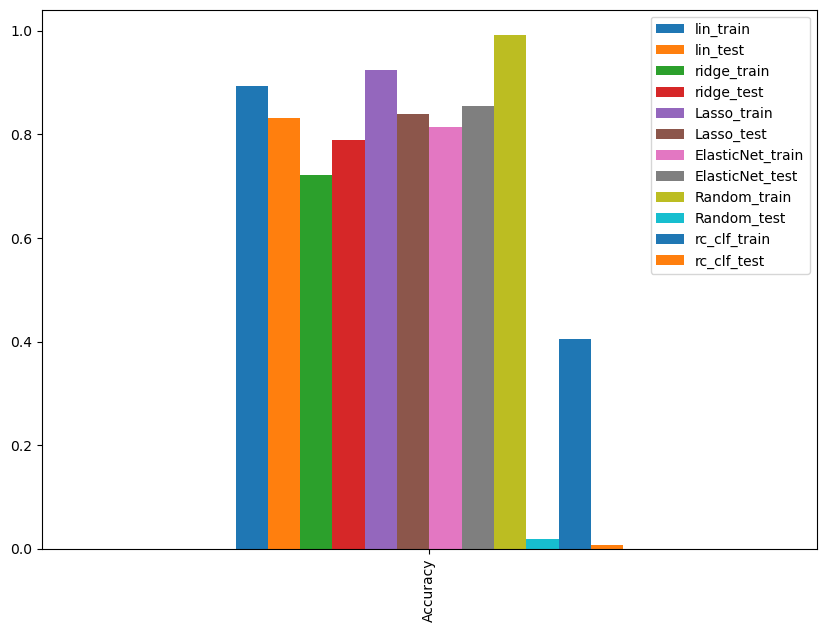

In [93]:
comapre_accurcy_reg = pd.DataFrame(({"lin_train":model_0_accuracy_train,"lin_test":model_0_accuracy_test,
                        "ridge_train":model_1_accuracy_train,"ridge_test":model_1_accuracy_test,
                         "Lasso_train":model_2_accuracy_train,"Lasso_test":model_2_accuracy__test,
                         "ElasticNet_train":model_3_accuracy_train,"ElasticNet_test":model_3_accuracy_test,
                         "Random_train":model_4_accuracy_train,"Random_test":model_4_accuracy_test,
                         "rc_clf_train":rs_clf_accuracy,"rc_clf_test":rs_clf_test_accuracy
                        },
                       ),index=['Accuracy'])

comapre_accurcy_reg.plot.bar(figsize=(10,7))

<AxesSubplot:>

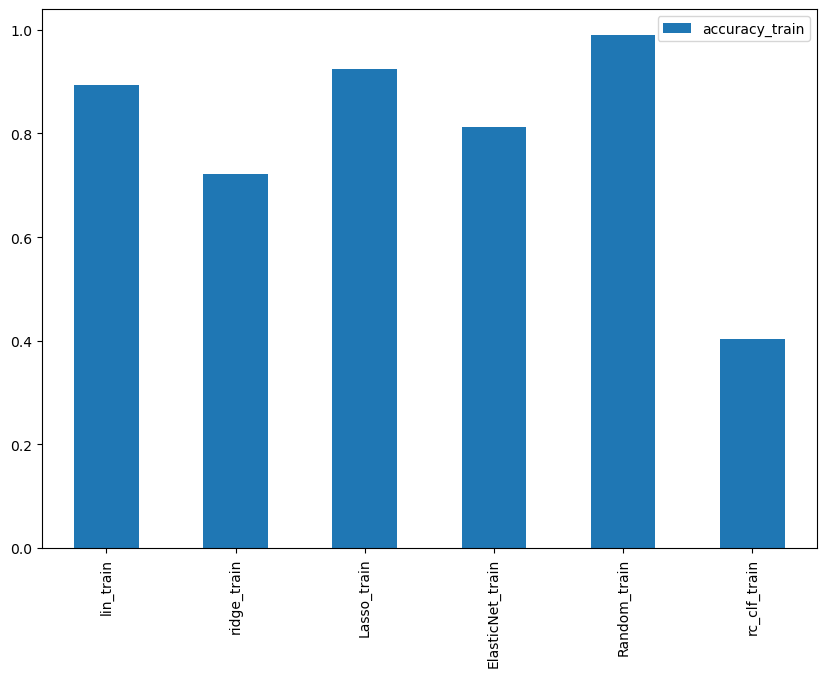

In [94]:
comapre_accurcy_train_reg = pd.DataFrame(({"lin_train":model_0_accuracy_train,
                        "ridge_train":model_1_accuracy_train,
                         "Lasso_train":model_2_accuracy_train,
                         "ElasticNet_train":model_3_accuracy_train,
                         "Random_train":model_4_accuracy_train,
                         "rc_clf_train":rs_clf_accuracy
                        },
                       ),index=['accuracy_train']).T

comapre_accurcy_train_reg.plot.bar(figsize=(10,7))

<AxesSubplot:>

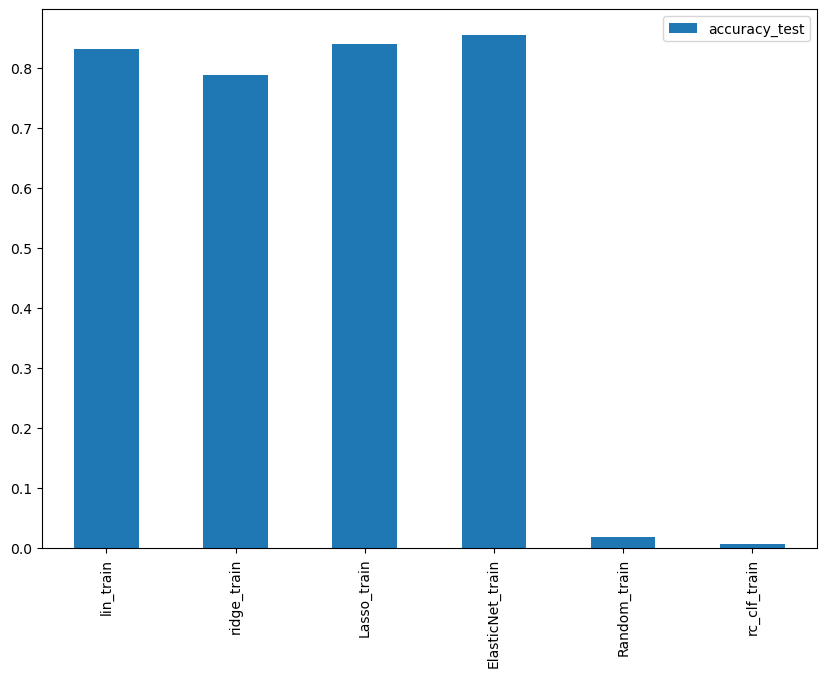

In [95]:
comapre_accurcy_test_reg = pd.DataFrame(({"lin_train":model_0_accuracy_test,
                        "ridge_train":model_1_accuracy_test,
                         "Lasso_train":model_2_accuracy__test,
                         "ElasticNet_train":model_3_accuracy_test,
                         "Random_train":model_4_accuracy_test,
                         "rc_clf_train":rs_clf_test_accuracy
                        },
                       ),index=['accuracy_test']).T

comapre_accurcy_test_reg.plot.bar(figsize=(10,7))

In [96]:
df_test = pd.read_csv("test.csv")
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [97]:
df_test.shape,df.shape

((1459, 80), (1339, 75))

In [98]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [99]:
df_test.isna().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

<AxesSubplot:>

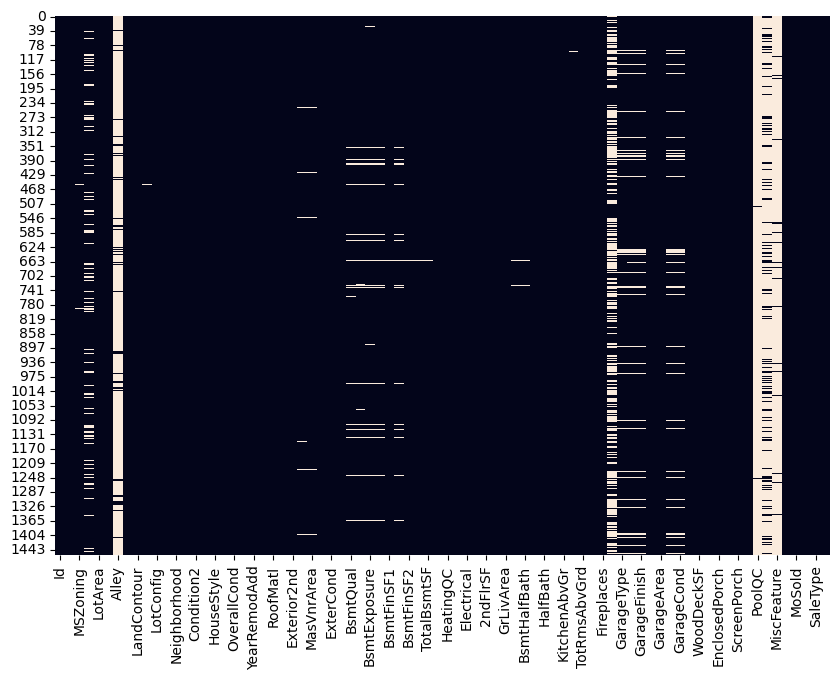

In [100]:
fig,ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_test.isnull(),cbar=False)

In [101]:
df_test['Id'].isnull().sum()

0

In [102]:
nan_cols = [i for i in df_test.columns if df_test[i].isnull().any()]
len(nan_cols)

33

In [103]:
def check_null_values_test():
    nan_cols = [i for i in df_test.columns if df_test[i].isnull().any()]
    print(nan_cols)

In [104]:
check_null_values_test()

['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [105]:
def find_index_of_row(column):
    return(df_test[df_test[column].isnull()].index.tolist())

In [106]:
find_index_of_row('MSZoning')

[455, 756, 790, 1444]

In [107]:
def drop_null_values_test(list_of_index):
    df_test.drop(list_of_index, axis=0, inplace=True)
    return check_null_columns(df_test)

In [108]:
df_test['MSZoning'].value_counts()

RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

In [109]:
df_test['MSZoning'].fillna('RL',inplace=True)

In [110]:
df_test['LotFrontage'] = df_test['LotFrontage'].mean()

In [111]:
check_null_values_test()

['Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [112]:
df_test['Alley'].isna().sum()

1352

In [113]:
df_test.drop('Alley',axis=1,inplace=True)

In [115]:
df_test['Utilities'].fillna('AllPub',inplace=True)

In [116]:
df_test['Exterior1st'].fillna('VinylSd',inplace=True)

In [117]:
df_test['Exterior2nd'].fillna('VinylSd',inplace=True)

In [118]:
df_test['MasVnrType'].fillna("BrkFace",inplace=True)

In [119]:
df_test['MasVnrArea'].fillna(0.0,inplace=True)

In [120]:
df_test['BsmtQual'].fillna('TA',inplace=True)

In [121]:
check_null_columns(df_test)

['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [122]:
df_test['BsmtCond'].fillna('TA',inplace=True)

In [123]:
df_test['BsmtExposure'].fillna('No',inplace=True)

In [124]:
check_null_columns(df_test)

['BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [125]:
df_test['BsmtFinType1'].fillna('GLQ',inplace=True)

In [126]:
df_test['BsmtFinSF1'].fillna(0.0,inplace=True)

In [127]:
check_null_columns(df_test)

['BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [128]:
df_test['BsmtFinType2'].fillna('Unf',inplace=True)

In [129]:
df_test['BsmtFinSF2'].fillna(0.0,inplace=True)

In [130]:
check_null_columns(df_test)

['BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [131]:
df_test['BsmtUnfSF'].fillna(0.0,inplace=True)

In [132]:
df_test['TotalBsmtSF'].fillna(864.0,inplace=True)

In [133]:
df_test['BsmtFullBath'].fillna(1.0,inplace=True)

In [134]:
df_test['BsmtHalfBath'].fillna(0.0,inplace=True)

In [135]:
check_null_columns(df_test)

['KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [136]:
df_test['KitchenQual'].fillna('TA',inplace=True)

In [137]:
df_test['Functional'].fillna('Typ',inplace=True)

In [138]:
df_test['GarageType'].fillna('Attchd',inplace=True)

In [139]:
check_null_columns(df_test)

['FireplaceQu', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [140]:
df_test['FireplaceQu'].fillna('Gd',inplace=True)

In [141]:
df_test['GarageYrBlt'].fillna(2005.0,inplace=True)

In [142]:
df_test['GarageFinish'].fillna('Unf',inplace=True)

In [143]:
df_test['GarageCars'].fillna(2.0,inplace=True)

In [144]:
df_test['GarageArea'].fillna(576.0,inplace=True)

In [145]:
df_test['GarageQual'].fillna('TA',inplace=True)

In [146]:
df_test['GarageCond'].fillna('TA',inplace=True)

In [147]:
check_null_columns(df_test)

['PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [148]:
df_test['PoolQC'].fillna('Ex',inplace=True)

In [149]:
df_test['Fence'].fillna('MnPrv',inplace=True)

In [150]:
df_test['MiscFeature'].fillna('Shed',inplace=True)

In [151]:
df_test['SaleType'].fillna('WD',inplace=True)

In [152]:
check_null_columns(df_test)

[]


<AxesSubplot:>

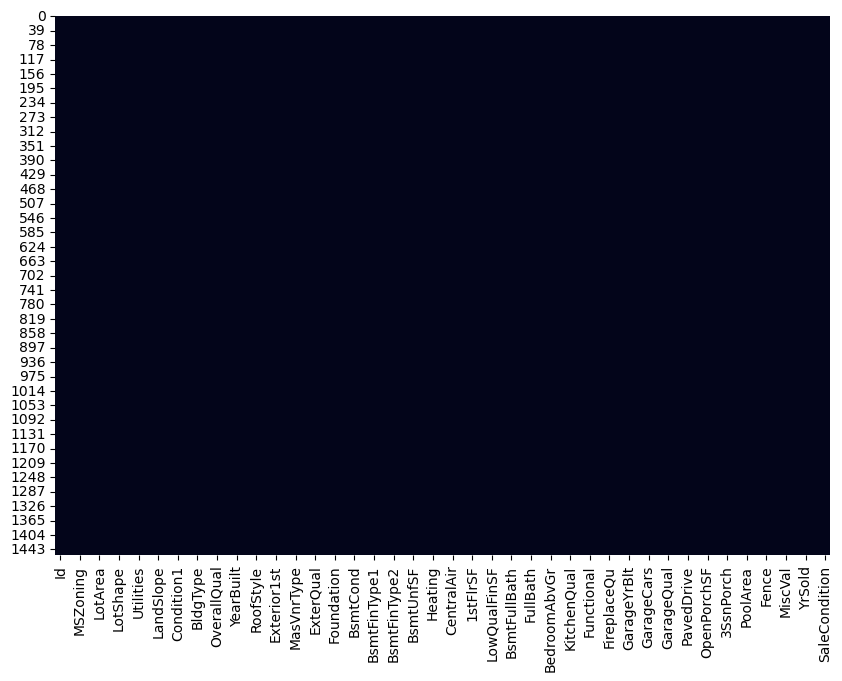

In [153]:
fig,ax = plt.subplots(figsize=(10,7))
sns.heatmap(df_test.isnull(),cbar=False)

In [154]:
for label,content in df_test.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
PoolQC
Fence
MiscFeature
SaleType
SaleCondition


In [157]:
df_temp = df_test.copy()
for label,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[label] = content.astype('category').cat.as_ordered()

In [158]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   LotShape       1459 non-null   object 
 7   LandContour    1459 non-null   object 
 8   Utilities      1459 non-null   object 
 9   LotConfig      1459 non-null   object 
 10  LandSlope      1459 non-null   object 
 11  Neighborhood   1459 non-null   object 
 12  Condition1     1459 non-null   object 
 13  Condition2     1459 non-null   object 
 14  BldgType       1459 non-null   object 
 15  HouseStyle     1459 non-null   object 
 16  OverallQual    1459 non-null   int64  
 17  OverallCond    1459 non-null   int64  
 18  YearBuil

In [161]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1339 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1339 non-null   int64  
 1   MSSubClass     1339 non-null   int64  
 2   MSZoning       1339 non-null   object 
 3   LotFrontage    1339 non-null   float64
 4   LotArea        1339 non-null   int64  
 5   Street         1339 non-null   object 
 6   LotShape       1339 non-null   object 
 7   LandContour    1339 non-null   object 
 8   Utilities      1339 non-null   object 
 9   LotConfig      1339 non-null   object 
 10  LandSlope      1339 non-null   object 
 11  Neighborhood   1339 non-null   object 
 12  Condition1     1339 non-null   object 
 13  Condition2     1339 non-null   object 
 14  BldgType       1339 non-null   object 
 15  HouseStyle     1339 non-null   object 
 16  OverallQual    1339 non-null   int64  
 17  OverallCond    1339 non-null   int64  
 18  YearBuil

In [162]:
dummies_2 = pd.get_dummies(df_test[["MSZoning",
"Street",
"LotShape",
"LandContour",
"Utilities",
"LotConfig",
"LandSlope",
"Neighborhood",
"Condition1",
"Condition2",
"BldgType",
"HouseStyle",
"RoofStyle",
"RoofMatl",
"Exterior1st",
"Exterior2nd",
"MasVnrType",
"ExterQual",
"ExterCond",
"Foundation",
"BsmtQual",
"BsmtCond",
"BsmtExposure",
"BsmtFinType1",
"BsmtFinType2",
"Heating",
"HeatingQC",
"CentralAir",
"Electrical",
"KitchenQual",
"Functional",
"GarageType",
"GarageFinish",
"GarageQual",
"GarageCond",
"PavedDrive",
"SaleType",
"SaleCondition"]])


In [163]:
df_test.drop(["MSZoning",
"Street",
"LotShape",
"LandContour",
"Utilities",
"LotConfig",
"LandSlope",
"Neighborhood",
"Condition1",
"Condition2",
"BldgType",
"HouseStyle",
"RoofStyle",
"RoofMatl",
"Exterior1st",
"Exterior2nd",
"MasVnrType",
"ExterQual",
"ExterCond",
"Foundation",
"BsmtQual",
"BsmtCond",
"BsmtExposure",
"BsmtFinType1",
"BsmtFinType2",
"Heating",
"HeatingQC",
"CentralAir",
"Electrical",
"KitchenQual",
"Functional",
"GarageType",
"GarageFinish",
"GarageQual",
"GarageCond",
"PavedDrive",
"SaleType",
"SaleCondition"],axis=1,inplace=True)

In [164]:
x_final = pd.concat([df_test,dummies_2],axis=1)
x.shape,x_final.shape

((1339, 74), (1459, 259))

In [165]:
set(x_final.columns) - set(x.columns)

{'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'BsmtCond_Fa',
 'BsmtCond_Gd',
 'BsmtCond_Po',
 'BsmtCond_TA',
 'BsmtExposure_Av',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtExposure_No',
 'BsmtFinType1_ALQ',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_Rec',
 'BsmtFinType1_Unf',
 'BsmtFinType2_ALQ',
 'BsmtFinType2_BLQ',
 'BsmtFinType2_GLQ',
 'BsmtFinType2_LwQ',
 'BsmtFinType2_Rec',
 'BsmtFinType2_Unf',
 'BsmtQual_Ex',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'CentralAir_N',
 'CentralAir_Y',
 'Condition1_Artery',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Artery',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Electrical_FuseA',
 'Electrical_FuseF',
 'Electrical_FuseP',
 'Electrical_SBrkr',
 'ExterCond_Ex',
 'ExterCond_Fa',
 'Ext

In [167]:
x_final['Condition2_RRAe'] = x['Condition2_RRAe']

KeyError: 'Condition2_RRAe'

In [168]:
x_final['Condition2_RRAn'] = x['Condition2_RRAn']
x_final['Condition2_RRNn'] = x['Condition2_RRNn']
x_final['Electrical_Mix'] = x['Electrical_Mix']
x_final['Exterior1st_CBlock'] = x['Exterior1st_CBlock']
x_final['Exterior1st_ImStucc'] = x['Exterior1st_ImStucc']
x_final['Exterior1st_Stone'] = x['Exterior1st_Stone']
x_final['Exterior2nd_AsphShn']=x['Exterior2nd_AsphShn']
x_final['Exterior2nd_CBlock']=x['Exterior2nd_CBlock']
x_final['Exterior2nd_Other']=x['Exterior2nd_Other']
x_final['Exterior2nd_Stone']=x['Exterior2nd_Stone']
x_final['Functional_Sev']=x['Functional_Sev']
x_final['GarageQual_Ex']=x['GarageQual_Ex']
x_final['Heating_Grav']=x['Heating_Grav']
x_final['Heating_OthW']=x['Heating_OthW']
x_final['HouseStyle_2.5Fin']=x['HouseStyle_2.5Fin']
x_final['RoofMatl_ClyTile']=x['RoofMatl_ClyTile']
x_final['RoofMatl_Membran']=x['RoofMatl_Membran']
x_final['RoofMatl_Metal']=x['RoofMatl_Metal']
x_final['RoofMatl_Roll']=x['RoofMatl_Roll']
x_final['Utilities_NoSeWa']=x['Utilities_NoSeWa']

KeyError: 'Condition2_RRAn'

In [169]:
set(x_final.columns) - set(x.columns)

{'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'BsmtCond_Fa',
 'BsmtCond_Gd',
 'BsmtCond_Po',
 'BsmtCond_TA',
 'BsmtExposure_Av',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtExposure_No',
 'BsmtFinType1_ALQ',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_Rec',
 'BsmtFinType1_Unf',
 'BsmtFinType2_ALQ',
 'BsmtFinType2_BLQ',
 'BsmtFinType2_GLQ',
 'BsmtFinType2_LwQ',
 'BsmtFinType2_Rec',
 'BsmtFinType2_Unf',
 'BsmtQual_Ex',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'CentralAir_N',
 'CentralAir_Y',
 'Condition1_Artery',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Artery',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Electrical_FuseA',
 'Electrical_FuseF',
 'Electrical_FuseP',
 'Electrical_SBrkr',
 'ExterCond_Ex',
 'ExterCond_Fa',
 'Ext

In [170]:
set(x_final.columns)-set(x.columns)

{'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'BsmtCond_Fa',
 'BsmtCond_Gd',
 'BsmtCond_Po',
 'BsmtCond_TA',
 'BsmtExposure_Av',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtExposure_No',
 'BsmtFinType1_ALQ',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_Rec',
 'BsmtFinType1_Unf',
 'BsmtFinType2_ALQ',
 'BsmtFinType2_BLQ',
 'BsmtFinType2_GLQ',
 'BsmtFinType2_LwQ',
 'BsmtFinType2_Rec',
 'BsmtFinType2_Unf',
 'BsmtQual_Ex',
 'BsmtQual_Fa',
 'BsmtQual_Gd',
 'BsmtQual_TA',
 'CentralAir_N',
 'CentralAir_Y',
 'Condition1_Artery',
 'Condition1_Feedr',
 'Condition1_Norm',
 'Condition1_PosA',
 'Condition1_PosN',
 'Condition1_RRAe',
 'Condition1_RRAn',
 'Condition1_RRNe',
 'Condition1_RRNn',
 'Condition2_Artery',
 'Condition2_Feedr',
 'Condition2_Norm',
 'Condition2_PosA',
 'Condition2_PosN',
 'Electrical_FuseA',
 'Electrical_FuseF',
 'Electrical_FuseP',
 'Electrical_SBrkr',
 'ExterCond_Ex',
 'ExterCond_Fa',
 'Ext

In [ ]:
# x_final.drop(['BsmtExposure_Av',
#  'BsmtExposure_Gd',
#  'BsmtExposure_Mn',
#  'BsmtExposure_No',
#  'ExterCond_Po',
#  'Exterior1st_AsphShn',
#  'Fence',
#  'FireplaceQu',
#  'Foundation_Slab',
#  'Heating_Wall',
#  'MiscFeature',
#  'PoolQC'],axis=1,inplace=True)
x_final.shape

In [171]:
x.shape,x_final.shape

((1339, 74), (1459, 259))

In [172]:
check_null_columns(x_final)

[]


In [173]:
# ""def drop_null_values(list_of_index):
#     x_final.drop(list_of_index, axis=0, inplace=True)
#     return check_null_columns(x_final)""

x_final.fillna(0.0,inplace=True)

In [174]:
x.shape,x_final.shape

((1339, 74), (1459, 259))

In [175]:
# def find_index_of_row(column):
# #     return(x_final[x_final[column].isnull()].index.tolist())
x_final.drop(['BsmtExposure_Av',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtExposure_No',
 'ExterCond_Po',
 'Exterior1st_AsphShn',
 'Fence',
 'FireplaceQu',
 'Foundation_Slab',
 'Heating_Wall',
 'MiscFeature',
 'PoolQC'],axis=1,inplace=True)

In [176]:
# check_null_columns(x_final)
x.shape,x_final.shape

((1339, 74), (1459, 247))

In [177]:
x_final['SalePrice']=False

In [178]:
test_predict = model_4.predict(x_final)
test_predict

ValueError: X has 248 features, but RandomForestClassifier is expecting 262 features as input.

In [ ]:
df_preds.to_csv('file2.csv', header=True, index=False)

In [ ]:
pd.read_csv('file2.csv')

In [ ]:
df_preds.to_csv('final_preds.csv', header=True, index=False)

In [ ]:
pd.read_csv('final_preds.csv')

In [ ]:
""""-----------------------------------------------------End of Project-----------------------------------------------------""""